In [4]:
import pandas as pd
import numpy as np

In [5]:
import pandas as pd

# Reading the CSV files
d1 = pd.read_csv("student-mat.csv", sep=";")
d2 = pd.read_csv("student-por.csv", sep=";")

# Merging the DataFrames on specified columns
merge_columns = ["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"]
d3 = pd.merge(d1, d2, on=merge_columns)

# Print the number of rows in the merged DataFrame
print(f"Number of students: {len(d3)}")
d3.head()


Number of students: 382


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [6]:
print(d3.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_x', 'traveltime_x', 'studytime_x',
       'failures_x', 'schoolsup_x', 'famsup_x', 'paid_x', 'activities_x',
       'nursery', 'higher_x', 'internet', 'romantic_x', 'famrel_x',
       'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x',
       'G1_x', 'G2_x', 'G3_x', 'guardian_y', 'traveltime_y', 'studytime_y',
       'failures_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y',
       'higher_y', 'romantic_y', 'famrel_y', 'freetime_y', 'goout_y', 'Dalc_y',
       'Walc_y', 'health_y', 'absences_y', 'G1_y', 'G2_y', 'G3_y'],
      dtype='object')


In [7]:
# Combing Medu and Fedu to create combined parent education 

d3['Combined_Parent_Edu'] = d3[['Medu', 'Fedu']].max(axis=1)


The resulting series (a column) of maximum values is then assigned to a new column in d3 called Combined_Parent_Edu.


In [8]:
# Calculate frequency distribution
combined_edu_freq = d3['Combined_Parent_Edu'].value_counts().sort_index()

print("Frequency distribution of combined parental education levels:")
print(combined_edu_freq)


Frequency distribution of combined parental education levels:
1     36
2     90
3     97
4    159
Name: Combined_Parent_Edu, dtype: int64


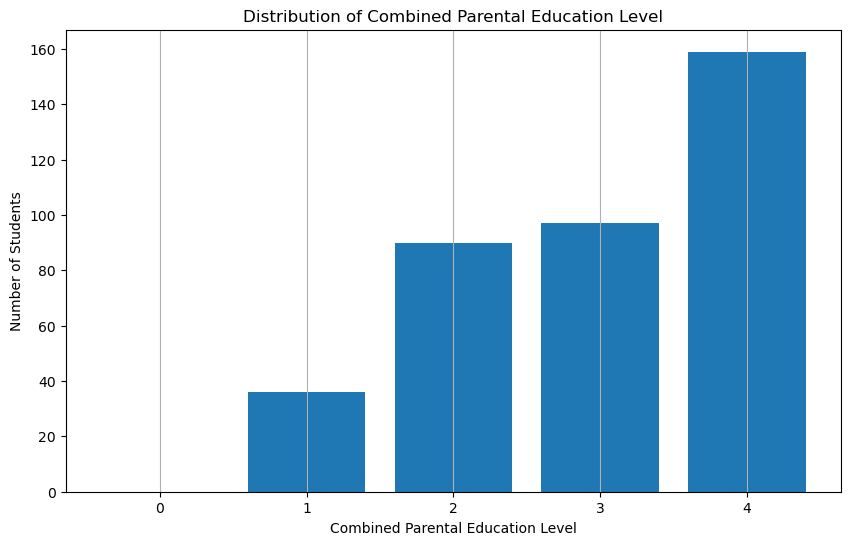

In [9]:
import matplotlib.pyplot as plt

# Plotting a histogram
plt.figure(figsize=(10, 6))
d3['Combined_Parent_Edu'].hist(bins=range(6), rwidth=0.8, align='left')
plt.title('Distribution of Combined Parental Education Level')
plt.xlabel('Combined Parental Education Level')
plt.ylabel('Number of Students')
plt.xticks(range(5))
plt.grid(axis='y')

plt.show()


Interpretation
This distribution indicates a sufficient number of observations across each combined parental education level to proceed with ANOVA. It's noteworthy that the number of students increases with higher levels of parental education.

Proceeding with the ANOVA analysis with these groups. This balanced enough distribution across the levels allows for a meaningful comparison of the impact of different levels of parental education on students' final grades.

Hypotheses for Combined Analysis
Null Hypothesis (H0): There is no significant difference in student performance (final grades in Math G3_x and Portuguese G3_y) across the different levels of combined parental education.

Alternative Hypothesis (H1): Student performance (final grades in Math G3_x and Portuguese G3_y) differs significantly among the different levels of combined parental education.

In [10]:
# Lets do annova test for math subject 
from scipy.stats import f_oneway

# Extracting final grades for each combined parental education level for the math subject
grades_by_parent_edu = [d3[d3['Combined_Parent_Edu'] == level]['G3_x'] for level in range(1, 5)]  # Levels 1 to 4

# Performing ANOVA
f_stat, p_value = f_oneway(*grades_by_parent_edu)

print(f'ANOVA for Math Subject - Combined Parental Education:')
print(f'F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}')


ANOVA for Math Subject - Combined Parental Education:
F-statistic: 6.729, p-value: 0.000


Interpretation:

These results indicate that there are statistically significant differences in math final grades (G3_x) among the different levels of combined parental education. The extremely low p-value (reported as 0.000, suggesting it's very close to zero but not exactly zero due to rounding) strongly rejects the null hypothesis (H0), supporting the alternative hypothesis (H1) that student performance in math differs significantly across the various levels of combined parental education.

In [11]:
# Post hoc analysis 
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming 'd3' has a column 'G3_x' for math grades and 'Combined_Parent_Edu' for the combined education levels
tukey = pairwise_tukeyhsd(endog=d3['G3_x'], groups=d3['Combined_Parent_Edu'], alpha=0.05)

print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   1.4389 0.3847 -0.8943 3.7721  False
     1      3   2.2878 0.0532 -0.0212 4.5968  False
     1      4   3.3255 0.0006  1.1417 5.5092   True
     2      3   0.8489 0.5858 -0.8827 2.5805  False
     2      4   1.8866 0.0105  0.3259 3.4473   True
     3      4   1.0377 0.2961 -0.4866  2.562  False
---------------------------------------------------


The Tukey HSD post-hoc analysis results reveal the differences in math final grades (G3_x) between groups of students categorized by combined parental education levels. Here's a breakdown and interpretation of your results:

Tukey HSD Results Interpretation
Group 1 vs. Group 2: The mean difference is 1.4389, with a p-value of 0.3847. The difference is not statistically significant (reject = False), suggesting that, between these two levels of combined parental education, there isn't a significant difference in math grades.

Group 1 vs. Group 3: The mean difference is 2.2878, with a p-value of 0.0532. This comparison is on the edge of significance (reject = False), indicating a marginal difference in math grades that might suggest a trend but does not meet the conventional threshold for statistical significance.

Group 1 vs. Group 4: The mean difference is 3.3255, with a p-value of 0.0006. This difference is statistically significant (reject = True), indicating that students whose parents have the highest level of combined education (Group 4) perform significantly better in math than those with the lowest level of combined parental education (Group 1).

Group 2 vs. Group 3: The mean difference is 0.8489, with a p-value of 0.5858. The difference is not statistically significant (reject = False), suggesting no significant difference in math grades between these two levels of combined parental education.

Group 2 vs. Group 4: The mean difference is 1.8866, with a p-value of 0.0105. This difference is statistically significant (reject = True), indicating that students with parents at the highest level of combined education (Group 4) achieve significantly higher math grades than those in Group 2.

Group 3 vs. Group 4: The mean difference is 1.0377, with a p-value of 0.2961. The difference is not statistically significant (reject = False), suggesting that there isn't a significant difference in math grades between these groups.

Overall Conclusion
The Tukey HSD results highlight significant differences in math performance primarily related to the highest level of combined parental education (Group 4) compared to the lower levels (Groups 1 and 2). This suggests a notable advantage in math grades for students whose parents have the highest education levels.


The significant difference between Group 1 (lowest level of parental education) and Group 4 (highest level of parental education) underscores the potential impact of parental education background on student academic performance.
The marginal significance between Groups 1 and 3 suggests a potential trend where higher parental education may correlate with better student performance, though the evidence is not as strong.

The lack of significance between Groups 2 and 3, and between Groups 3 and 4, suggests that the middle categories of parental education do not differ markedly from each other in terms of their association with student math grades.
These insights could be instrumental for educators and policymakers in understanding the role of parental education in student academic outcomes and developing targeted support for students who may benefit from additional resources or interventions.

In [12]:
# Lets check for the portugese Subject 
from scipy.stats import f_oneway

# Extracting final grades for each combined parental education level for the Portuguese subject
grades_by_parent_edu_y = [d3[d3['Combined_Parent_Edu'] == level]['G3_y'] for level in range(1, 5)]  # Levels 1 to 4

# Performing ANOVA
f_stat_y, p_value_y = f_oneway(*grades_by_parent_edu_y)

print(f'ANOVA for Portuguese Subject - Combined Parental Education:')
print(f'F-statistic: {f_stat_y:.3f}, p-value: {p_value_y:.3f}')


ANOVA for Portuguese Subject - Combined Parental Education:
F-statistic: 6.437, p-value: 0.000


Interpretation:

These results signify that there are statistically significant differences in Portuguese final grades (G3_y) among the different levels of combined parental education. The very low p-value (reported as 0.000, which suggests it's extremely close to zero but not exactly zero due to rounding) strongly suggests rejecting the null hypothesis in favor of the alternative hypothesis. This indicates that the level of parental education has a significant effect on student performance in Portuguese, similar to the Math subject results.

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming 'd3' has a column 'G3_y' for Portuguese grades and 'Combined_Parent_Edu' for combined education levels
tukey_results_y = pairwise_tukeyhsd(endog=d3['G3_y'], groups=d3['Combined_Parent_Edu'], alpha=0.05)

print(tukey_results_y)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.3444 0.9303 -1.1233 1.8122  False
     1      3   0.8505 0.4319 -0.6021 2.3031  False
     1      4   1.7264  0.007  0.3526 3.1002   True
     2      3   0.5061  0.628 -0.5833 1.5954  False
     2      4    1.382 0.0018  0.4002 2.3638   True
     3      4   0.8759 0.0873  -0.083 1.8348  False
---------------------------------------------------


The Tukey HSD post-hoc analysis results for the Portuguese subject, given the combined parental education levels, provide detailed comparisons between different levels of parental education regarding their impact on Portuguese final grades (G3_y). Here's how to interpret these findings:

Tukey HSD Results Interpretation
Group 1 vs. Group 2:

Mean Difference: 0.3444, p-value: 0.9303.
The difference is not statistically significant (reject = False), suggesting no significant difference in Portuguese grades between these two levels of parental education.
Group 1 vs. Group 3:

Mean Difference: 0.8505, p-value: 0.4319.
The difference is not statistically significant (reject = False), indicating that the difference in Portuguese grades between these levels of parental education is not statistically meaningful.
Group 1 vs. Group 4:

Mean Difference: 1.7264, p-value: 0.007.
This difference is statistically significant (reject = True), indicating that students whose parents have the highest level of education (Group 4) perform significantly better in Portuguese than those with the lowest level of parental education (Group 1).
Group 2 vs. Group 3:

Mean Difference: 0.5061, p-value: 0.628.
The difference is not statistically significant (reject = False), suggesting no significant impact of these specific levels of parental education on Portuguese grades.
Group 2 vs. Group 4:

Mean Difference: 1.382, p-value: 0.0018.
This difference is statistically significant (reject = True), indicating that students with parents at the highest education level (Group 4) have significantly higher Portuguese grades than those in Group 2.
Group 3 vs. Group 4:

Mean Difference: 0.8759, p-value: 0.0873.
The difference is not statistically significant (reject = False), but it's closer to the threshold for significance, suggesting a potential trend where higher parental education might be associated with better Portuguese grades, although this specific comparison does not meet the conventional significance level.
Overall Conclusion
The Tukey HSD post-hoc analysis underscores the significant advantage in Portuguese grades for students whose parents have the highest level of combined education (Group 4), particularly compared to those with the lowest level of combined parental education (Group 1) and those in the intermediate group (Group 2). These findings suggest that higher parental education levels might contribute to an environment that supports better academic outcomes in Portuguese, similar to what was observed in Math.

However, the lack of significant differences between some of the groups, especially between the intermediate levels of parental education (Groups 2 and 3 vs. Group 4), indicates that while parental education is a factor, its impact might be more nuanced and could depend on other supporting factors or thresholds beyond which additional educational attainment in parents does not translate into significant incremental academic performance benefits for their children in Portuguese.

These insights can inform targeted educational policies and practices aimed at leveraging parental education as a resource for improving student performance, recognizing the role of family background in educational achievement.






